# Probabilistic Word Associations: An Application of Markov Processes

**Author:** Matthew McKay

To build intuition, this notebook provides a quick demonstration of how Markov matrices can be used in an simple way to produce some interesting sequences. This example forms a basis of some simple Machine Learning (or Probabilistic Computing) applications.

The **main idea** is to use some training data to estimate a probabilistic Markov transition matrix for the purpose of generating reasonably coherent sentences that are effectively randomly generated sequences that abide by a set of probabilistic rules.

We will go through the following steps:

1. Obtain some data from which we can measure transition probabilities
1. Clean the data
1. Analyse and Compute transition probabilities
1. Generate random sentence sequences

**Basic Idea:**

Consider the following sentence:

> Pierre well knew this large room divided by columns and an arch, its
walls hung round with Persian carpets. The part of the room behind the
columns, with a high silk-curtained mahogany bedstead on one side and on
the other an immense case containing icons, was brightly illuminated
with red light like a Russian church during evening service. (Tolstoy, *War and Peace*)

If you consider a sentence as a sequence of words, then this data can be used to estimate word transition probablities in the sequence. From the small sample above we know that the word **an** is likely to follow the words **and** and **other**. More rigourous relationships can be computed given a larger learning sample from which to infer state changes. 

This type of problem lends itself to **computational** analysis.

Once we numerically evaluate the tranistion probabilities we can then use this information to generate new **random** sequences that exhibit similar sentence structure observed by the training data. 

**Motivation:**
1. Build some intution behind Markov processes
1. Start building some tools for working with Data
1. Relate back to the Markov component of the Lake Model
1. Demonstrate how some problems need computational solutions

## Data

Data is contained in the **data** directory. For this excercise We will use the famous book *War and Peace* by Leo Tolstoy

In [6]:
book = []
for line in open('./data/book-war-and-peace.txt', 'r'):
    book.append(line)

In [7]:
book[0:10]

['CHAPTER I\n',
 '\n',
 '"Well, Prince, so Genoa and Lucca are now just family estates of the\n',
 "Buonapartes. But I warn you, if you don't tell me that this means war,\n",
 'if you still try to defend the infamies and horrors perpetrated by that\n',
 'Antichrist--I really believe he is Antichrist--I will have nothing more\n',
 "to do with you and you are no longer my friend, no longer my 'faithful\n",
 "slave,' as you call yourself! But how do you do? I see I have frightened\n",
 'you--sit down and tell me all the news."\n',
 '\n']

In [8]:
len(book)

63845

## Data Cleaning

We can observe that this data will need to be cleaned up. If we are interested in computing **psuedo-random** stories then we are focused on **paragraphs** and not **markup** like *Chapter I* etc. 

You will often spend a lot of time parsing the data looking for necessary ways to clean it up. It is also often a good idea to document your assumptions:

1. CHAPTER always appears on its own line
1. \n or newline character should be discarded (from blank and the end of each sentence)

In [9]:
import re
cleaned_data = []
discarded_data = []
for line in book:
    if line == "\n":
        continue
    if re.search("CHAPTER", line):
        discarded_data.append(line)
        continue
    cleaned_data.append(line.strip("\n"))

In [10]:
cleaned_data[0:10]

['"Well, Prince, so Genoa and Lucca are now just family estates of the',
 "Buonapartes. But I warn you, if you don't tell me that this means war,",
 'if you still try to defend the infamies and horrors perpetrated by that',
 'Antichrist--I really believe he is Antichrist--I will have nothing more',
 "to do with you and you are no longer my friend, no longer my 'faithful",
 "slave,' as you call yourself! But how do you do? I see I have frightened",
 'you--sit down and tell me all the news."',
 'It was in July, 1805, and the speaker was the well-known Anna Pavlovna',
 'Scherer, maid of honor and favorite of the Empress Marya Fedorovna. With',
 'these words she greeted Prince Vasili Kuragin, a man of high rank and']

**Discuss:** What do you think about **punctuation**?

# Simple Python Implementation

Let us use Python to explore this type of problem to give us intution behind Markov processes (albiet from a **computational** lingustics perspective). 

First we want to split the book into **words**

In [11]:
#-Generate an ordered collection of words-#
words = []
for line in cleaned_data:
    collection = line.split(" ")
    words.extend(collection)

In [12]:
words[0:10]

['"Well,',
 'Prince,',
 'so',
 'Genoa',
 'and',
 'Lucca',
 'are',
 'now',
 'just',
 'family']

In [13]:
len(words)   #Many PhD thesis are < 100,000 words. This is a big book.

561849

Let us **first** consider simple adjacency relationships between words

In [14]:
stats = dict()
for idx,word in enumerate(words):
    if idx == 0:
        continue
    else:
        previous = words[idx-1]
        if previous in stats.keys():
            stats[previous].append(word)
        else:
            stats[previous] = [word]

In [15]:
stats['army']

['under',
 'is',
 'across?"',
 'abroad',
 'but',
 'was',
 'I',
 'to',
 'was',
 'was',
 'of',
 'into',
 'informed',
 'was',
 'will',
 'generally,',
 'had',
 'found',
 'of',
 'of',
 'of',
 'as',
 'crossed',
 'considerably.',
 'and',
 'interested',
 'would',
 'loots',
 'is',
 'and',
 '(I',
 'received',
 'too',
 'of',
 'are',
 'was',
 'he',
 'now',
 'was',
 'reached',
 'at',
 'which',
 'at',
 'he',
 'of',
 'of',
 'to',
 'was',
 'that',
 'the',
 'along',
 'was',
 'did',
 'somewhere',
 'to',
 'authorities',
 'point',
 'of',
 'was',
 'were',
 '(with',
 'slightly',
 'itself',
 'itself,',
 'which',
 'which',
 'should',
 'began',
 'were',
 'advanced',
 'circles',
 'swayed',
 'of',
 'had',
 'were',
 'is',
 'of',
 'been',
 'moved',
 'was',
 'had',
 'it',
 'at',
 'and',
 'are',
 'headquarters',
 'corps',
 'remains',
 'does',
 'to',
 'to',
 'which',
 'in',
 'doctor',
 'from',
 'rules',
 'regulations',
 'regulations',
 'regulations?"',
 'he',
 'reform,',
 'and',
 'and',
 'was',
 'began',
 'had',
 'ha

In [16]:
len(stats.keys())

41589

**Remember** There are so many words here as we have left punctuation in for the training data. This means that **and** and **and,** are *different* words.

In [17]:
#-Generate a Pseudorandom sentence-#
import random
sentence = ""
for i in range(100):
    if i == 0:
        previous_word = random.choice(list(stats.keys()))
    else:
        next_word = random.choice(stats[previous_word])
        sentence = sentence + " " + next_word
        previous_word = next_word

In [18]:
print(sentence)

 said Pierre, having received command armies! Why did it by laughter. "My blessing, and did not want to the corporal had seen, and in Switzerland and how you have you lent him a loaded cart..." Before the children, a man seemed to be a stable. The only now not half his face. "Thank you; it's my witness, I have been already see it were, but, seeing Count Orlov, looking at Kochubey. "There's one day the sight of genius, did not very worst of us we meet objections with a young women. Yes, my soirees. And all possible along the


Now let us explore a **Higher Order** word relationships. Consider previous word pairs. This will increase the number of states and collect higher order word relationships by considering chains of three words.

In [19]:
first, second = words[0], words[1]
#-Compute Samples-#
stats = dict()
for idx, word in enumerate(words):
    if idx == 0 or idx == 1:
        continue
    else:
        first, second = words[idx-2], words[idx-1]
        if (first,second) in stats.keys():
            stats[(first,second)].append(word)
        else:
            stats[(first,second)] = [word]

In [20]:
#-Generate a Pseudorandom sentence-#
import random
w1,w2 = random.choice(list(stats.keys()))
sentence = w1 + " " + w2
for i in range(100):
    next_word = random.choice(stats[(w1,w2)])
    sentence = sentence + " " + next_word
    w1,w2 = w2,next_word 

In [21]:
print(sentence)

a hobby of any science whatever. If there be nothing left of him! I tell you more," continued Prince Andrew, "one believes in him was not enough: he wanted to break matters off. "Because, consider, Count--if I allowed myself to be in their spare time, they will take it in. It was evident that whatever happens and whoever may stand at the usual order Natasha knew so well and seem to a footman. That old man wanted to tell her what she was regarded as genuinely due for value received. And to feel that..." she went on, and then I'll come out


In [22]:
#-Dictionaries as Sparse Matrix Representation-#
len(stats.keys())

254442

In [23]:
stats

{('At', 'six'): ['in'],
 ('pass', 'round'): ['the', 'to'],
 ('also', 'dreaming'): ['of'],
 ('limits', 'are'): ['very'],
 ('The', 'corporal'): ['replied', 'and', 'came,', 'frowned'],
 ('Faster', 'still'): ['the'],
 ('Petya.', '"No,'): ['I'],
 ('urged', 'Kutuzov'): ['to'],
 ('name)', 'replying'): ['to'],
 ('fingering', 'the'): ['key', 'buttons'],
 ('slaughtered.', 'Bennigsen'): ['on'],
 ('began', 'weeping'): ['and'],
 ('with', 'tea'): ['for'],
 ('him,', 'was'): ['drinking',
  'building',
  'about',
  'pedantic',
  'it',
  'something',
  'gazing',
  'approaching',
  'being',
  'kneeling',
  'restraining',
  'interested'],
 ('approaching.', 'And'): ['at'],
 ('her', 'stocking'): ['and'],
 ('father-in-law.', 'She'): ['was'],
 ('nothing', 'else,'): ['nothing,'],
 ('numbers', 'was'): ['to'],
 ('ask', 'his'): ['advice', 'pardon?', 'colonel'],
 ('much', 'gravity'): ['as'],
 ('report,', 'with'): ['the'],
 ('Just', 'at'): ['the'],
 ('or', 'English'): ['people,'],
 ('capital;', 'of'): ['course'],
 

Lets find the word pair with the **largest** sample list

In [24]:
max_word_sample_length = 0
for key in stats.keys():
    if len(stats[key]) > max_word_sample_length:
        max_word_sample_length = len(stats[key])
        word_sample = stats[key]
        word_sample_key = key

In [25]:
max_word_sample_length

4011

In [26]:
word_sample_key

('of', 'the')

In [27]:
word_sample[0:10]

['Buonapartes.',
 'Empress',
 'just',
 'best',
 'genuine',
 'world,',
 'head',
 'next',
 'aunt,',
 'circle']

## How many are duplicates?

In [28]:
import pandas as pd
data = pd.DataFrame(word_sample, columns=["words"])

In [29]:
data[data.duplicated()].size

1988

In [30]:
duplicated = data[data.duplicated()]

In [31]:
duplicated.head()

,words
22,best
28,duc
30,Duc
63,matter
76,doors


In [32]:
#-Let's Look at the word "best"
data[data == "best"].dropna()

,words
3,best
22,best
851,best
854,best
1250,best
1332,best
1560,best
1585,best
3539,best


**Including** word duplicates is an easy way to compute a discrete probability distribution when drawing **uniformly** from a sample. Having multiple instances of the word "best" increases its liklihood of being drawn at random from the list of 4011 options. 

These python implementations can be implemented by computing actual transition probabilities between State 1 (Word Pairs) and State 2 (Following Word). 

#### Comment on Dense vs. Sparse Data Structures

**Dense Matrix** Using a dense matrix representation this would involve a matrix that is 254,442 x 41,589 (Words + Punctuation). In these cases there will also be a **large** number of 0 values and a **sparse** matrix would be a more efficient way of storing these values.

## Exercise: Compute the numeric transition probabilities using the word frequencies that have been computed in the above Python implementation

## Other Markov Processes

Differences from this analysis to more typical Economic problems

1. Economic problems tend to be square markov matrices that track changes in global state.

### Example (from Strang (2009) "Introduction to Linear Algebra", 4th Edition)

The fraction of rental cars in Denver starts at $\frac{1}{50}=0.02$. The fraction outside of Denver is therefore $0.98$. Every month, $80\%$ of the Denver cars stay in Denver, and $20\%$ leave. Also $5\%$ of outside cars come in, and therefore $95\%$ stay outside of Denver). This means that the fractions $u_0 = (0.02, 0.98)$ are multiplied by A:

We can sumarise this information into transition probabilities $A$ and use this information to compute next months expected composition of cars in Denver.
$$
A = 
\begin{bmatrix}
    0.8 & 0.2 \\
    0.05 & 0.95 
\end{bmatrix}
$$

which is 

$$
u_1 = u_0*A = \begin{bmatrix}0.02 , 0.98 \end{bmatrix}*A=\begin{bmatrix}0.065 , 0.935 \end{bmatrix}
$$

The next month

$$
u_2 = u_1*A = \begin{bmatrix}0.09875 , 0.90125 \end{bmatrix}
$$

**What happens in the long run?** (A simulation point of view)

In [33]:
import numpy as np
A = np.array([[0.8, 0.2], [0.05, 0.95]])

In [34]:
A

array([[ 0.8 ,  0.2 ],
       [ 0.05,  0.95]])

In [35]:
A.sum(axis=1)  #Rows sum to 1

array([ 1.,  1.])

Starting with $u_0 = (0.02, 0.98)$ we iterate over the probability matrix for 100 time periods

In [36]:
#-Simulate-#
x = np.array([0.02,0.98])
for i in range(100):
    x = x @ A
print(x)

[ 0.2  0.8]


Why not the following?

In [37]:
x = np.array([[0.02],[0.98]])

In [38]:
x

array([[ 0.02],
       [ 0.98]])

In [39]:
x @ A

ValueError: shapes (2,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

Let us now simulate with an initial distribution of $u_0 = (0.0, 1.0)$

In [40]:
#-Simulate and save the path of the state variables-#
%matplotlib inline
import pandas as pd
x = [np.array([0,1])] #Initial Values for Denver and NotDenver#
for i in range(20):
    x.append(x[i] @ A)
x = pd.DataFrame(x, columns=['Denver','NotDenver']) 

In [41]:
x.head()

,Denver,NotDenver
0,0.000000,1.000000
1,0.050000,0.950000
2,0.087500,0.912500
3,0.115625,0.884375
4,0.136719,0.863281


### Plot Simulation Path

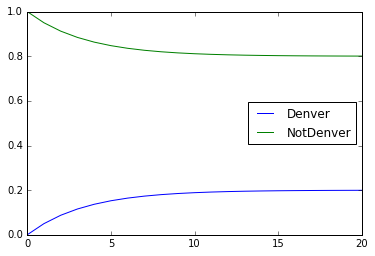

In [42]:
x.plot() #Plot Simulation

### Let us build a collection of simulations

In [43]:
#-Build a Collection of Simulations-#
seq = []
for v in np.arange(0,1.1,0.2):
    x = [np.array([v,1-v])] #Initial Values for Denver and NotDenver#
    for i in range(20):
        x.append(x[i] @ A)
    x = pd.DataFrame(x, columns=['Denver','NotDenver'])
    seq.append(x)

In [44]:
#-Consider the Initial Conditions-#
print("Initial Conditions for different simulation runs")
for item in seq:
    print(item.head(1))

Initial Conditions for different simulation runs
   Denver  NotDenver
0       0          1
   Denver  NotDenver
0     0.2        0.8
   Denver  NotDenver
0     0.4        0.6
   Denver  NotDenver
0     0.6        0.4
   Denver  NotDenver
0     0.8        0.2
   Denver  NotDenver
0       1          0


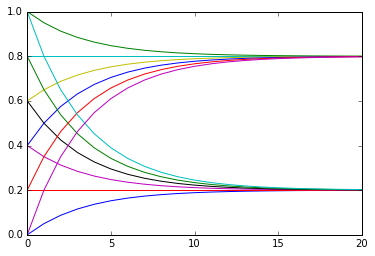

In [45]:
#-Plot the different paths on the same canvas-#
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca()
for item in seq:
    item.plot(ax=ax, legend=False)

While these simulations deliver some useful intuition. 

We can use **math** to solve for the steady state values using the **eigenvalues** and **eigenvectors** of the $A$ matrix

In [51]:
A

array([[ 0.8 ,  0.2 ],
       [ 0.05,  0.95]])

In [52]:
eigs, eigv = np.linalg.eig(A.T)   #Note: Transpose is because Numpy defaults to **right** eigenvectors

In [53]:
eigs

array([ 0.75,  1.  ])

In [54]:
eigv

array([[-0.70710678, -0.24253563],
       [ 0.70710678, -0.9701425 ]])

Taking the eigenvector of the unit eigenvalue of a **markov** matrix yeilds its steady state solution without the extensive simulation runs. 

In [55]:
eigv[:,1]/sum(eigv[:,1])

array([ 0.2,  0.8])

# Using QuantEcon Library

Let us cast the same **Denver** and **NotDenver** problem into the quantecon **MarkovChain**

In [56]:
import quantecon as qe
mc = qe.MarkovChain(A)
mc.stationary_distributions

array([[ 0.2,  0.8]])

In [57]:
ts_length = 100000
sample = mc.simulate(ts_length)

In [58]:
sample.sum() / ts_length               #Amount of time spent in State 2 (Not Denver)

0.79766999999999999